Dataset Shape: (21613, 21)

Linear Regression Performance
MAE: 110423.94
RMSE: 195673.19

Gradient Boosting Performance
MAE: 113350.33
RMSE: 201489.74


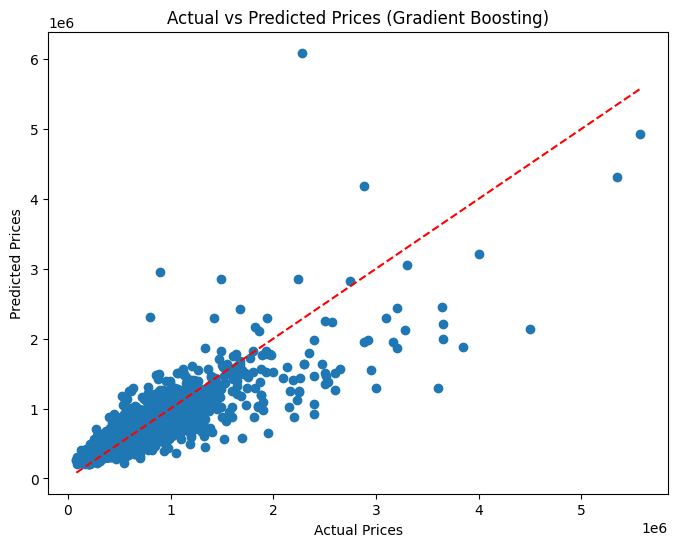

In [2]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


# 2. Load Dataset 
df = pd.read_csv("kc_house_data.csv")   

print("Dataset Shape:", df.shape)


# 3. Feature Selection
features = ["sqft_living", "bedrooms", "bathrooms", "grade", "zipcode"]
target = "price"

X = df[features]
y = df[target]

# 4. Preprocessing
numerical_features = ["sqft_living", "bedrooms", "bathrooms", "grade"]
categorical_features = ["zipcode"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)


# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 6. Linear Regression
lr_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


# 7. Gradient Boosting
gb_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", GradientBoostingRegressor(random_state=42))
])

gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)


# 8. Evaluation
def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    print(f"\n{model_name} Performance")
    print("MAE:", round(mae, 2))
    print("RMSE:", round(rmse, 2))

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_gb, "Gradient Boosting")


# 9. Visualization
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_gb)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Gradient Boosting)")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.show()
